In [2]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
%matplotlib inline

In [3]:
#importing the data
df=pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')
df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 10.0+ KB


In [6]:
df.shape

(180, 7)

In [7]:
df=df.dropna(axis=0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [12]:
df.isnull().sum()

Name     0
Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

# EDA

In [13]:
df.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,219.933333,24.729889,119.164111,19.788889,7.577778,1.188889
std,156.253669,13.619215,23.656547,16.399845,8.001373,1.688656
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,98.000000,14.665000,108.745000,6.250000,3.000000,0.000000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,330.750000,32.195000,131.997500,28.000000,10.000000,2.000000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


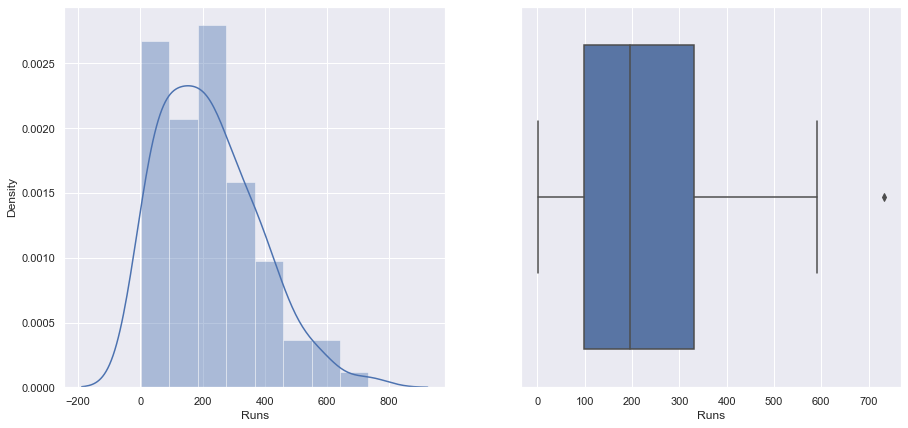

In [28]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'Runs', data=df , ax=axes[1])
sns.distplot(df['Runs'],  ax=axes[0])
plt.show()

#### As we can see there is an outlier to runs with runs 733. So one of the players with 733 runs topped the season.

In [37]:
#Player who score highest runs
df[df['Runs']==733.0].Name

1    CH Gayle
Name: Name, dtype: object

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


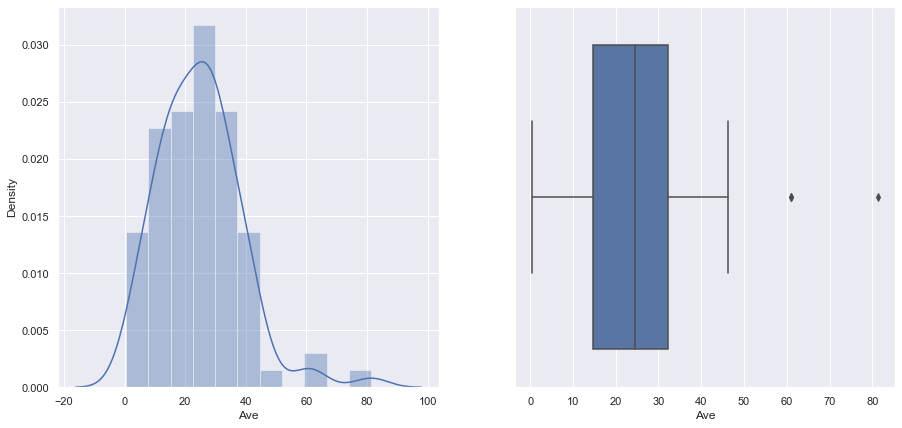

In [29]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'Ave', data=df , ax=axes[1])
sns.distplot(df['Ave'],  ax=axes[0])
plt.show()

#### It seems there are 2 outliers which suggests Average is slightly right sckewed.

In [41]:
#Lets find out who have better avegare than others
Q3 = np.percentile(df['Ave'],75)
Q1 = np.percentile(df['Ave'],25)
IQR = Q3 - Q1
Threshold = IQR*1.5
uf = Q3 + Threshold
df[df['Ave']>uf]

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
13,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0
19,JP Duminy,244.0,81.33,128.42,13.0,11.0,2.0


c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


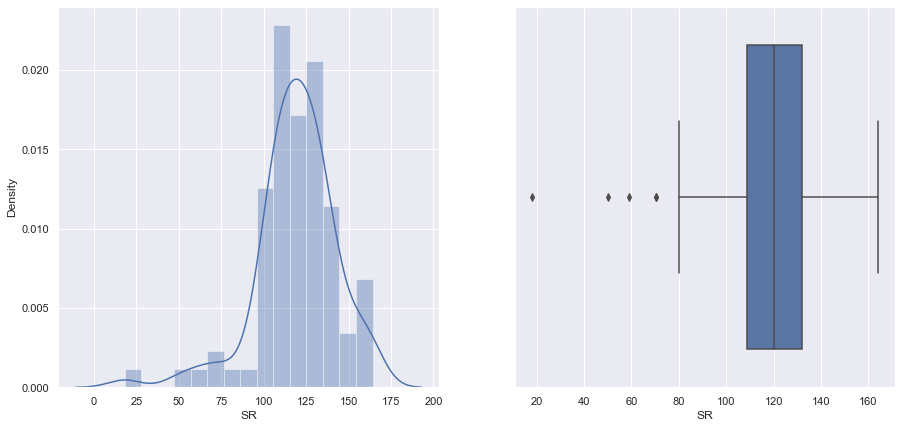

In [42]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'SR', data=df , ax=axes[1])
sns.distplot(df['SR'],  ax=axes[0])
plt.show()

#### It seems strike rate is left sckewed with 4 or more outliers at the loewr end.

In [44]:
#Lets find out who have lowest strike rates than others
Q3 = np.percentile(df['SR'],75)
Q1 = np.percentile(df['SR'],25)
IQR = Q3 - Q1
Threshold = IQR*1.5
lf = Q1 - Threshold
df[df['SR']<lf]

,Name,Runs,Ave,SR,Fours,Sixes,HF
171,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0
173,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0
175,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0
179,R Sharma,2.0,0.50,18.18,0.0,0.0,0.0


c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


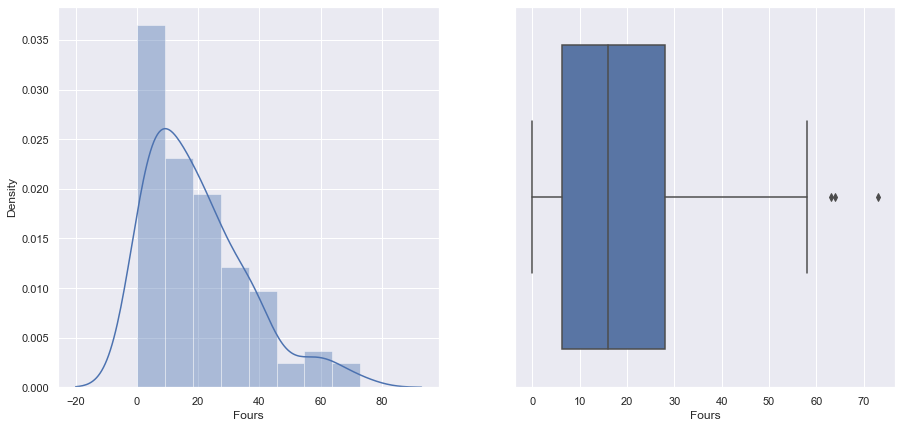

In [45]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'Fours', data=df , ax=axes[1])
sns.distplot(df['Fours'],  ax=axes[0])
plt.show()

#### In Fours also we have few outliers at the top end.

In [47]:
#Lets find out who have score more Fours than others
Q3 = np.percentile(df['Fours'],75)
Q1 = np.percentile(df['Fours'],25)
IQR = Q3 - Q1
Threshold = IQR*1.5
uf = Q3 + Threshold
df[df['Fours']>uf]

,Name,Runs,Ave,SR,Fours,Sixes,HF
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
11,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0
39,R Dravid,462.0,28.87,112.13,63.0,4.0,2.0


c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


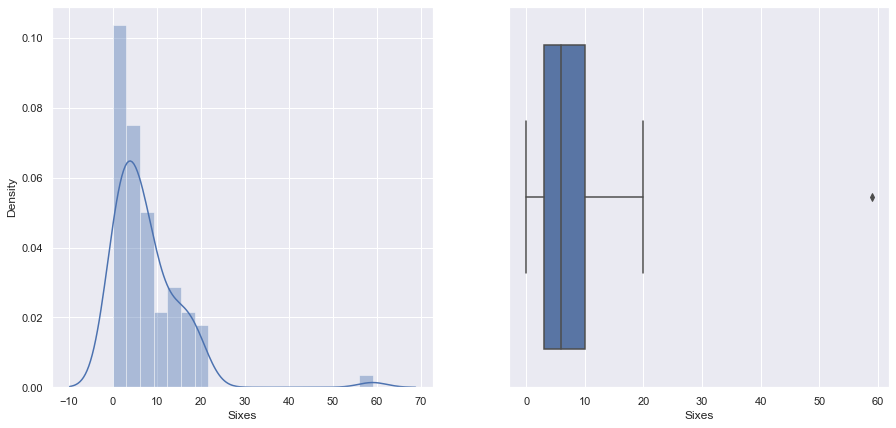

In [49]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'Sixes', data=df , ax=axes[1])
sns.distplot(df['Sixes'],  ax=axes[0])
plt.show()

#### It seems 1 outlier is making whole data seem like right sckewed. 

In [50]:
#Lets find out who have score the most sixes
Q3 = np.percentile(df['Sixes'],75)
Q1 = np.percentile(df['Sixes'],25)
IQR = Q3 - Q1
Threshold = IQR*1.5
uf = Q3 + Threshold
df[df['Sixes']>uf]

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0


c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


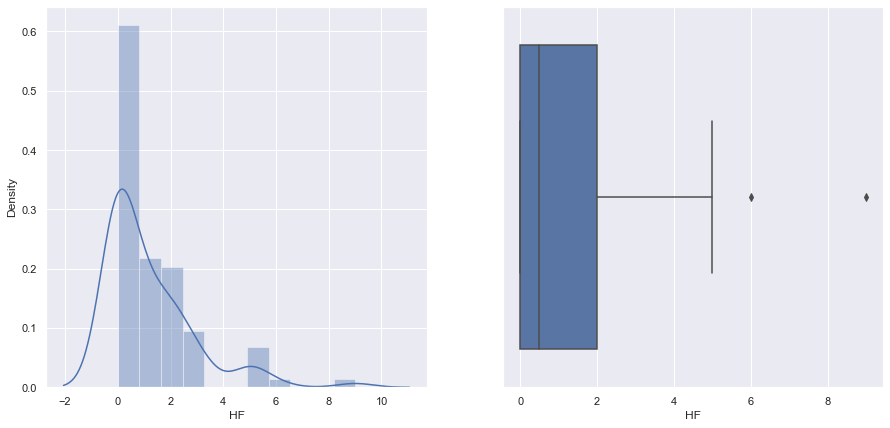

In [51]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'HF', data=df , ax=axes[1])
sns.distplot(df['HF'],  ax=axes[0])
plt.show()

####  It seems there are 2 or more outliers in Half Centuries

In [52]:
#Lets find out who have score the most 50s
Q3 = np.percentile(df['HF'],75)
Q1 = np.percentile(df['HF'],25)
IQR = Q3 - Q1
Threshold = IQR*1.5
uf = Q3 + Threshold
df[df['HF']>uf]

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0


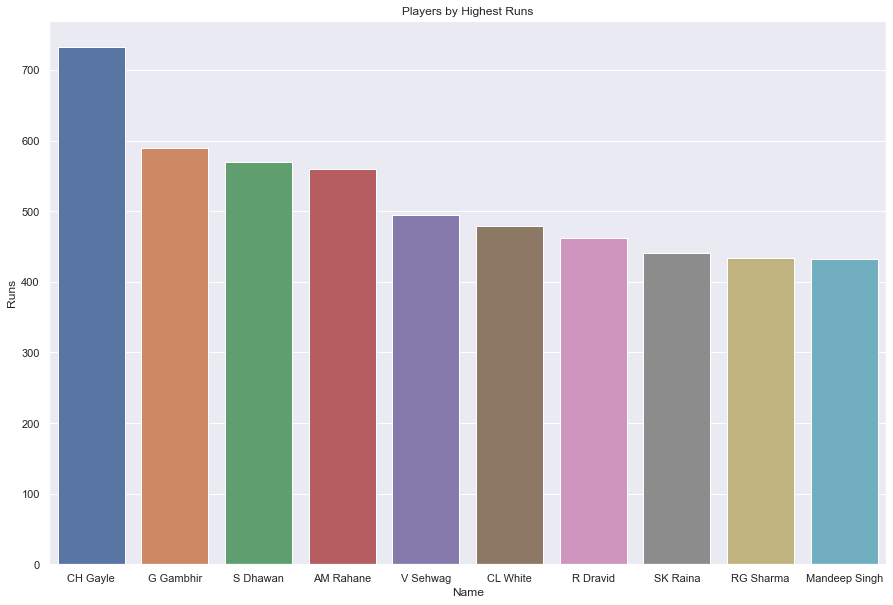

In [54]:
plt.figure(figsize=(15,10))
df1=df.groupby('Name')['Runs'].sum().sort_values(ascending = False).head(10)
df1= df1.reset_index() 
df1.columns = ['Name' ,'Runs']
sns.barplot(data= df1 , x= 'Name' , y ='Runs');
plt.title("Players by Highest Runs");

#### Gayle and Gambhir are two top scorer of the league.

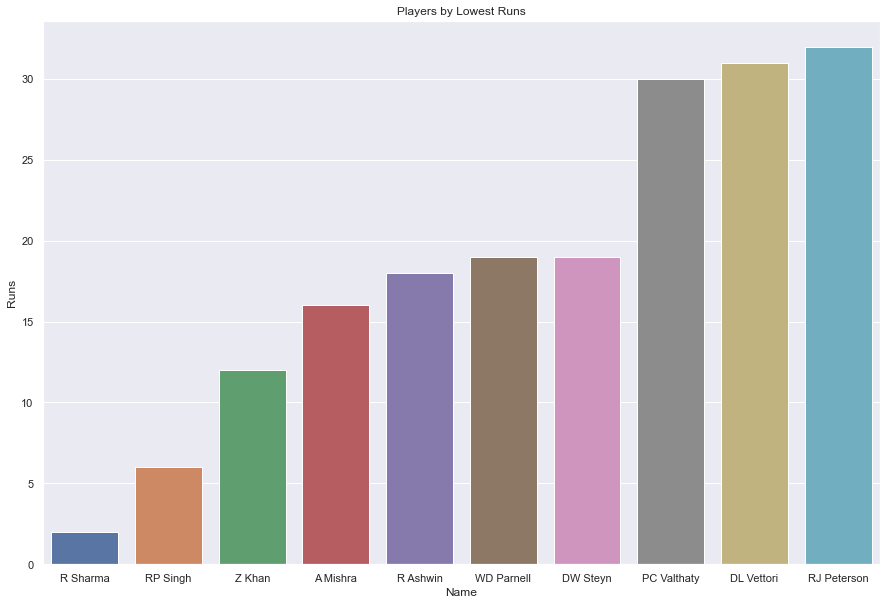

In [56]:
plt.figure(figsize=(15,10))
df1=df.groupby('Name')['Runs'].sum().sort_values(ascending = True).head(10)
df1= df1.reset_index() 
df1.columns = ['Name' ,'Runs']
sns.barplot(data= df1 , x= 'Name' , y ='Runs');
plt.title("Players by Lowest Runs");

#### R Sharma and RP Singh are lowest scorers of the leagues 

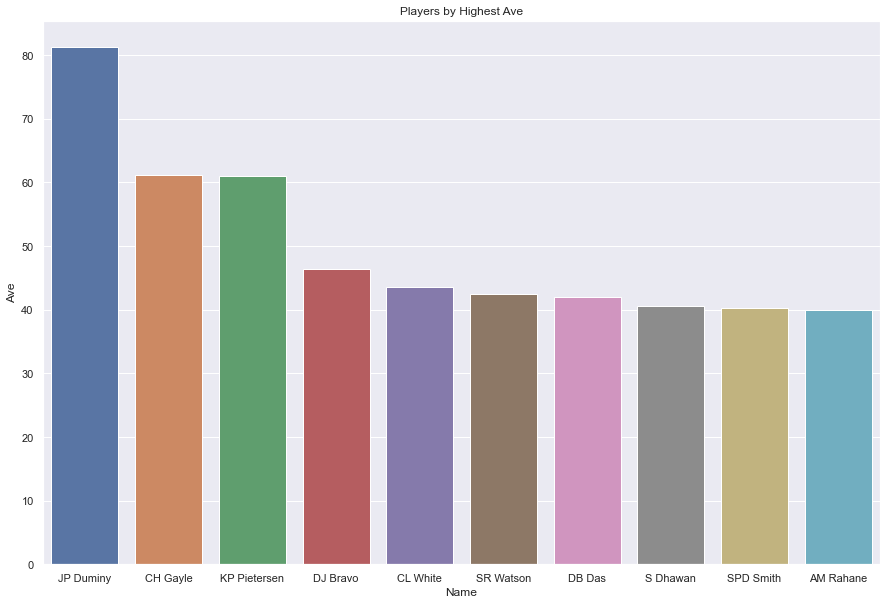

In [58]:
plt.figure(figsize=(15,10))
df1=df.groupby('Name')['Ave'].sum().sort_values(ascending = False).head(10)
df1= df1.reset_index() 
df1.columns = ['Name' ,'Ave']
sns.barplot(data= df1 , x= 'Name' , y ='Ave');
plt.title("Players by Highest Ave");

#### Duminy and Gayle scored runs with Highest average of all

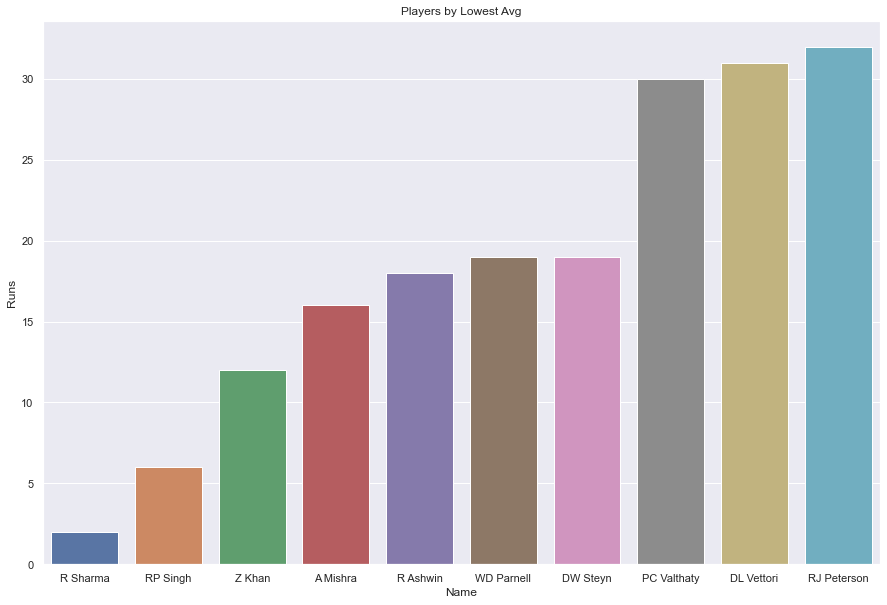

In [59]:
plt.figure(figsize=(15,10))
df1=df.groupby('Name')['Runs'].sum().sort_values(ascending = True).head(10)
df1= df1.reset_index() 
df1.columns = ['Name' ,'Runs']
sns.barplot(data= df1 , x= 'Name' , y ='Runs');
plt.title("Players by Lowest Avg");

#### R sharma and RP Singh have lowest average of all.

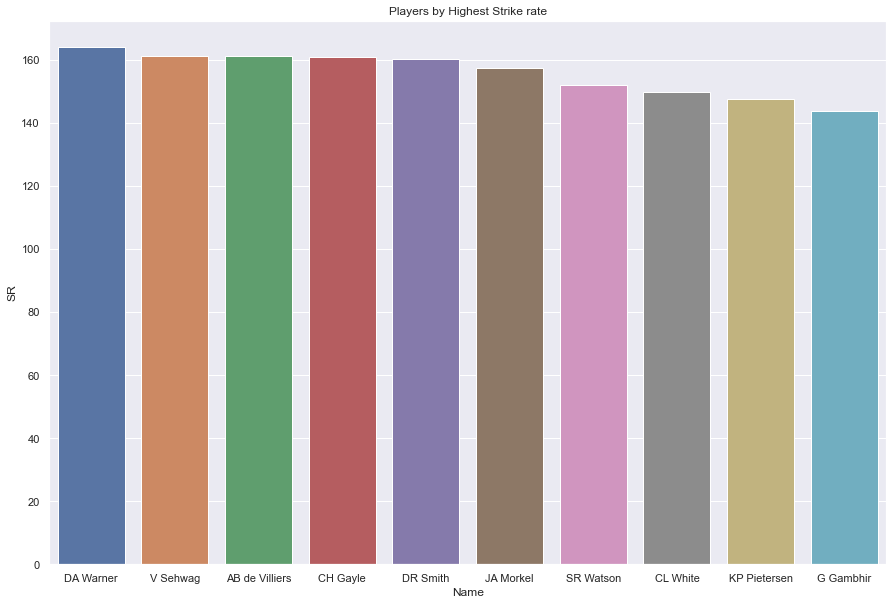

In [60]:
plt.figure(figsize=(15,10))
df1=df.groupby('Name')['SR'].sum().sort_values(ascending = False).head(10)
df1= df1.reset_index() 
df1.columns = ['Name' ,'SR']
sns.barplot(data= df1 , x= 'Name' , y ='SR');
plt.title("Players by Highest Strike rate");

#### Warner, Sehwag, AB, Gayle, Smith scored with strike rate more than 150. 

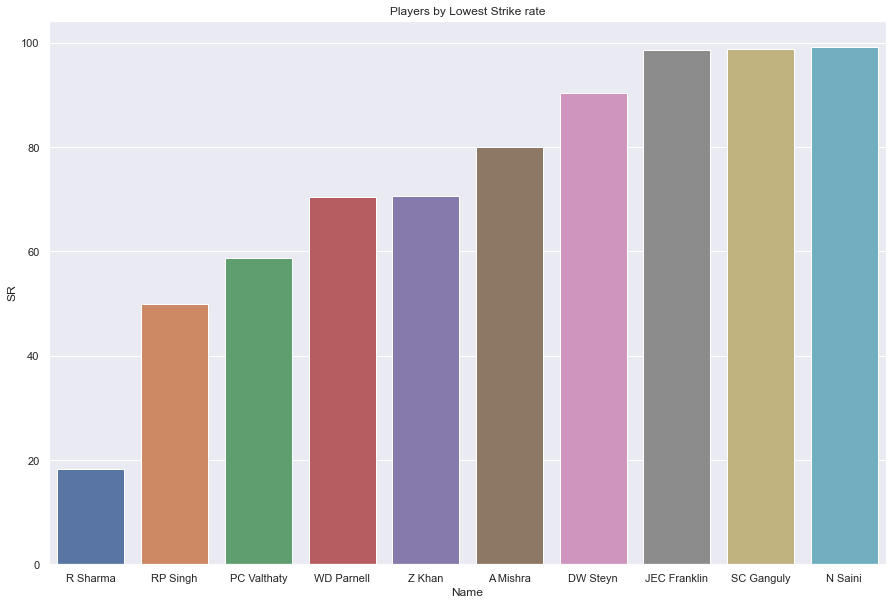

In [62]:
plt.figure(figsize=(15,10))
df1=df.groupby('Name')['SR'].sum().sort_values(ascending = True).head(10)
df1= df1.reset_index() 
df1.columns = ['Name' ,'SR']
sns.barplot(data= df1 , x= 'Name' , y ='SR');
plt.title("Players by Lowest Strike rate");

#### As Runs, Average, Strike Rate wise also Sharma and Singh are on lower side

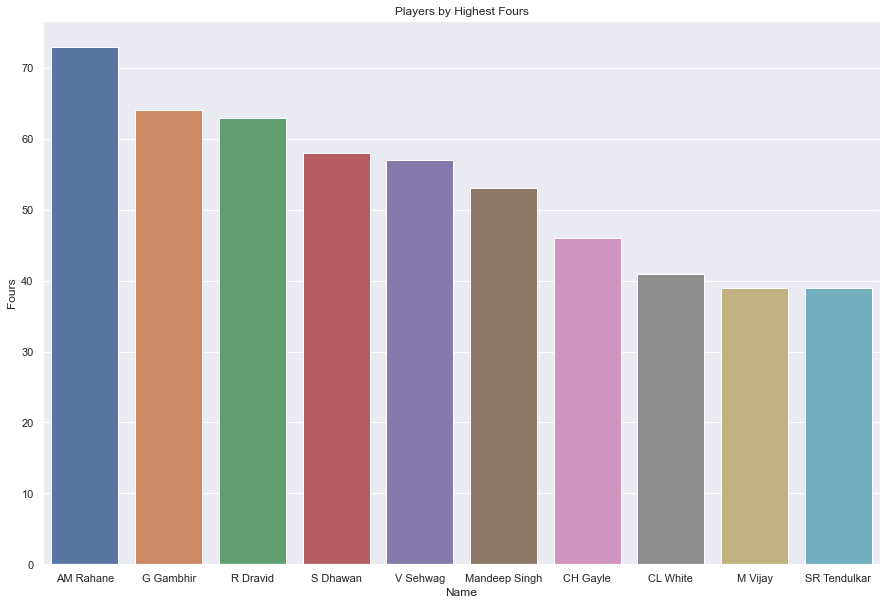

In [63]:
plt.figure(figsize=(15,10))
df1=df.groupby('Name')['Fours'].sum().sort_values(ascending = False).head(10)
df1= df1.reset_index() 
df1.columns = ['Name' ,'Fours']
sns.barplot(data= df1 , x= 'Name' , y ='Fours');
plt.title("Players by Highest Fours");

####  Rahane, Gambhir and Dravid has scored more than 60 fours

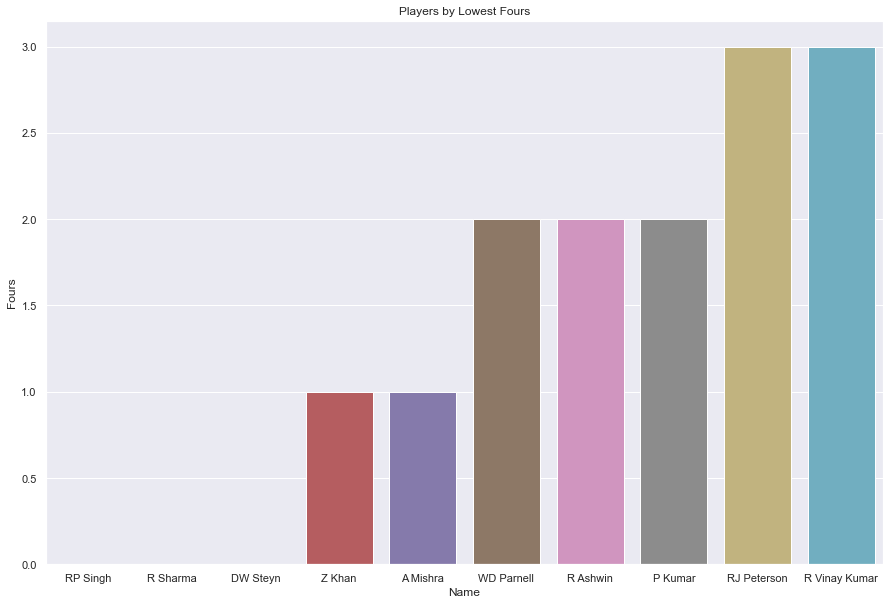

In [64]:
plt.figure(figsize=(15,10))
df1=df.groupby('Name')['Fours'].sum().sort_values(ascending = True).head(10)
df1= df1.reset_index() 
df1.columns = ['Name' ,'Fours']
sns.barplot(data= df1 , x= 'Name' , y ='Fours');
plt.title("Players by Lowest Fours");

#### Singh, Sharma and Steyn haven't scored any boundaries 

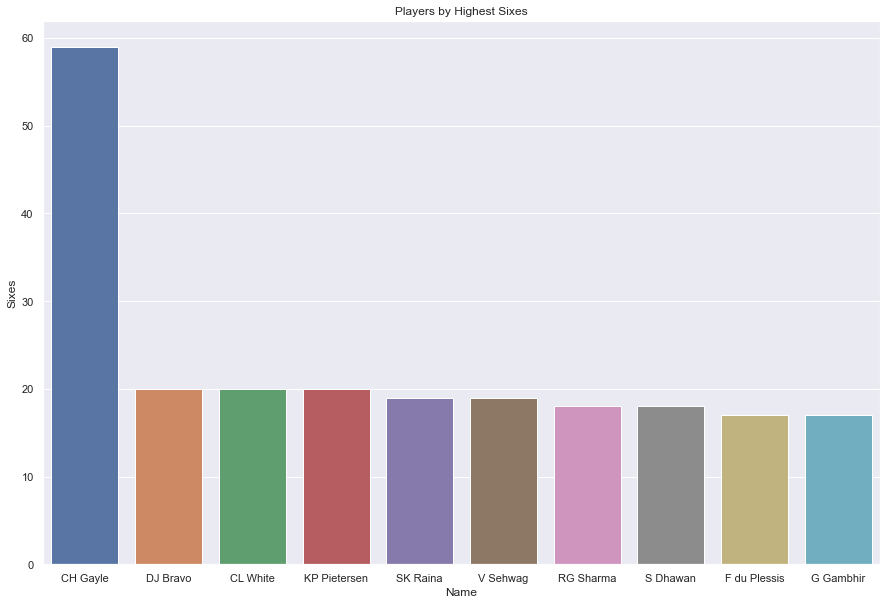

In [69]:
plt.figure(figsize=(15,10))
df1=df.groupby('Name')['Sixes'].sum().sort_values(ascending = False).head(10)
df1= df1.reset_index() 
df1.columns = ['Name' ,'Sixes']
sns.barplot(data= df1 , x= 'Name' , y ='Sixes');
plt.title("Players by Highest Sixes");

#### CH Gayle has scored highest number of 6s

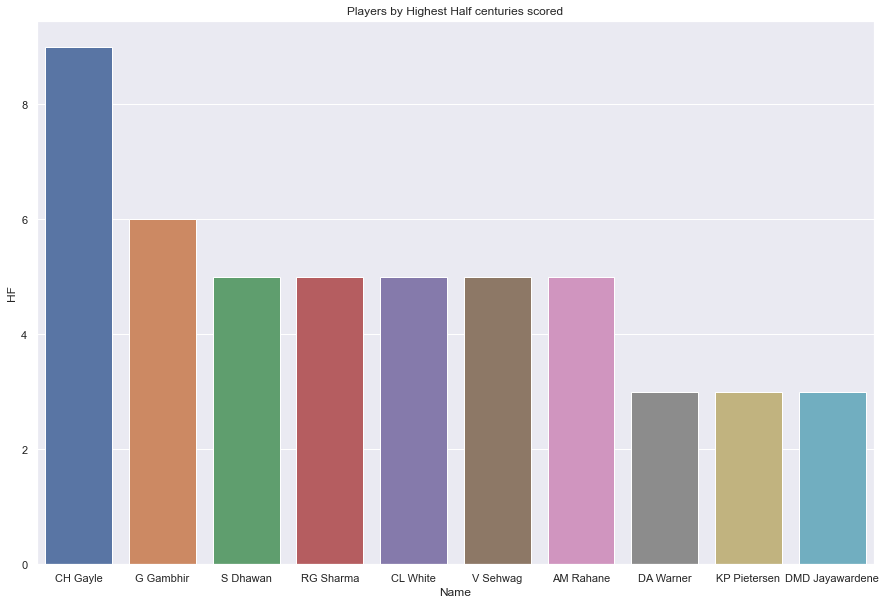

In [67]:
plt.figure(figsize=(15,10))
df1=df.groupby('Name')['HF'].sum().sort_values(ascending = False).head(10)
df1= df1.reset_index() 
df1.columns = ['Name' ,'HF']
sns.barplot(data= df1 , x= 'Name' , y ='HF');
plt.title("Players by Highest Half centuries scored");

#### Gayle and Gambhir only players who scored more than 5 50s.

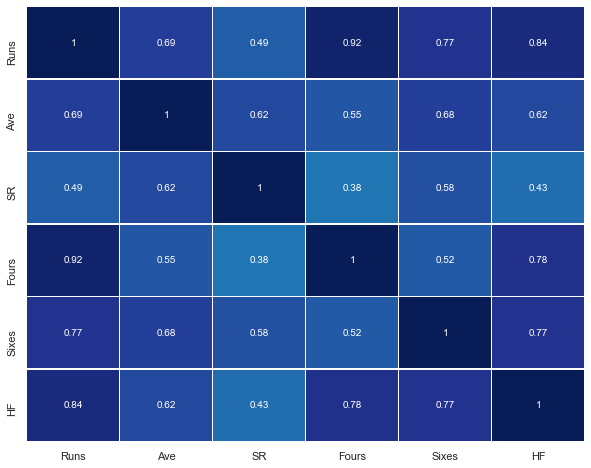

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

#### Except Strike rate and Runs, Strike rate and half centuries, Four and half centuries all others are higher correlation with each other

In [71]:
dfNew = df.copy()

In [72]:
# Boundary percentage are % of runs scored by boundaries
dfNew['BoundaryPerc'] = ((4*df['Fours']+6*df['Sixes'])/df['Runs'])*100

In [73]:
dfNew.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,BoundaryPerc
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,73.396999
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,60.677966
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,69.090909
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,59.290188
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,59.753954


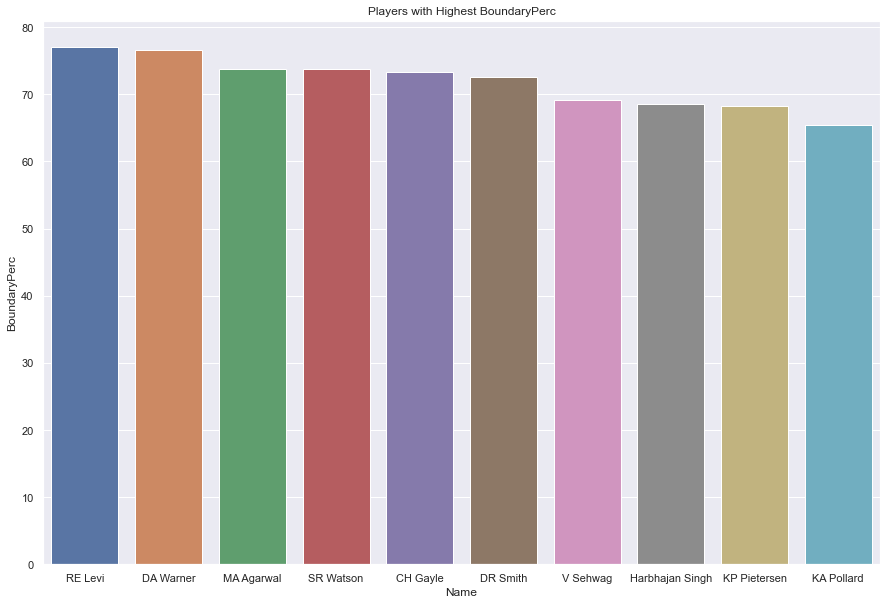

In [74]:
plt.figure(figsize=(15,10))
df1=dfNew.groupby('Name')['BoundaryPerc'].sum().sort_values(ascending = False).head(10)
df1= df1.reset_index() 
df1.columns = ['Name' ,'BoundaryPerc']
sns.barplot(data= df1 , x= 'Name' , y ='BoundaryPerc');
plt.title("Players with Highest BoundaryPerc");

#### Levi, Warner, Agarwal, Watson, Gayle and smith have scored more than 70% of their runs from boundaries.

In [75]:
# scaling the numeric variables
dfscaled =df.iloc[:,1:7] 
dfscaled1 = dfscaled.apply(zscore)
dfscaled1.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
3,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
5,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
7,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
9,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


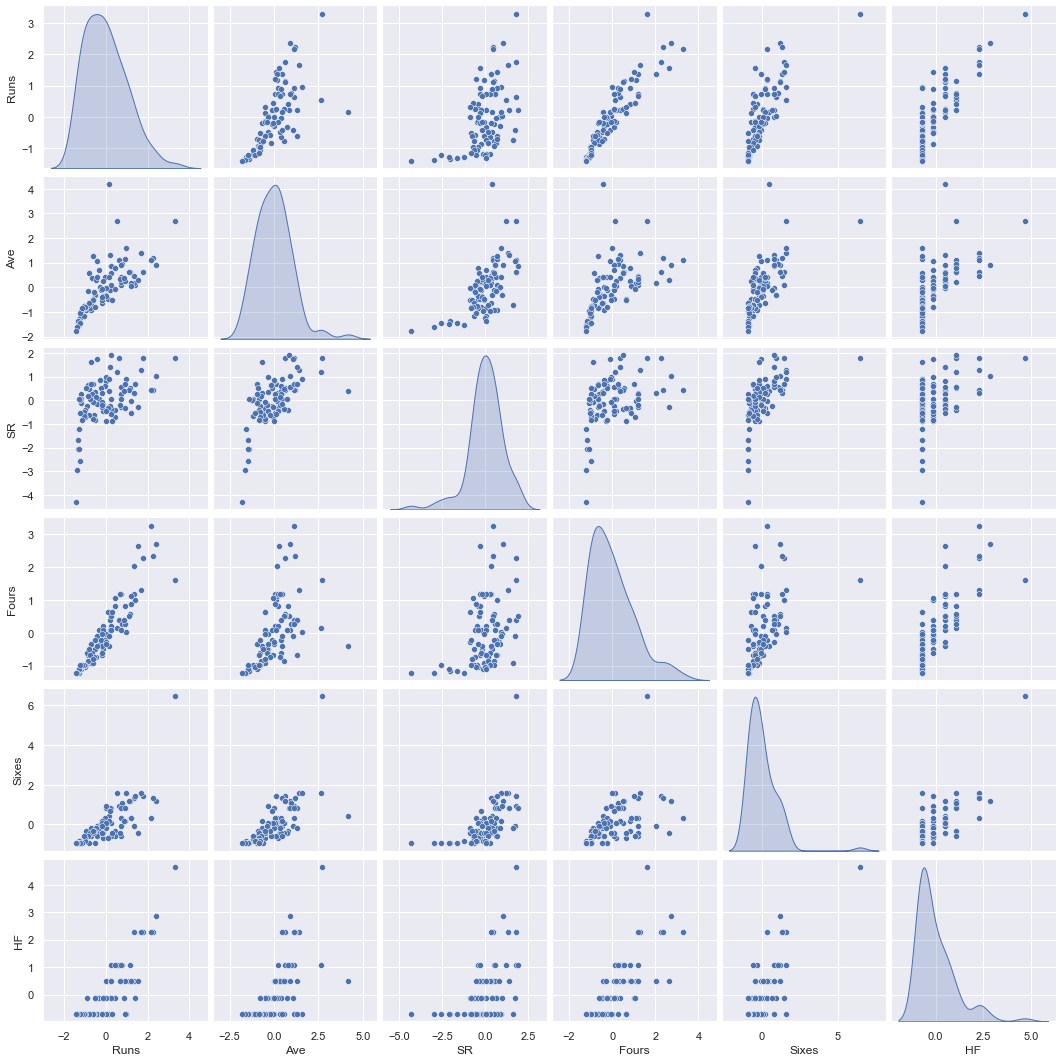

In [76]:
sns.pairplot(dfscaled1,diag_kind='kde')

#### From the pairplot, we can not conclude about how many clusters can be formed but it seems 1 or 2 clusters seems appropriate. 

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

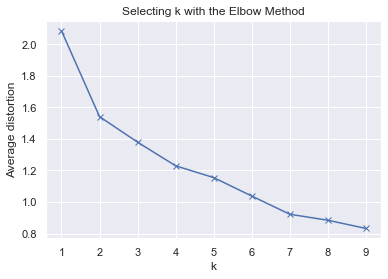

In [77]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfscaled1)
    prediction=model.predict(dfscaled1)
    meanDistortions.append(sum(np.min(cdist(dfscaled1, model.cluster_centers_, 'euclidean'), axis=1)) / dfscaled1.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#### 2 cluster seems appropriate here after which slope is going down 

In [81]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(dfscaled1)
prediction=final_model.predict(dfscaled1)

#Append the prediction 
df["Class"] = prediction
dfscaled1["Class"] = prediction
print("Classes Assigned : \n")
df.head()

Classes Assigned : 



,Name,Runs,Ave,SR,Fours,Sixes,HF,GROUP,Class
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,1,1
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,1,1
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,1,1
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,1,1
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,1,1


In [79]:
# Calculating silhouette_score
silhouette_score(dfscaled1,labels)

0.41111085574076756

In [82]:
classesClust = df.groupby(['Class'])
classesClust.mean()

,Runs,Ave,SR,Fours,Sixes,HF,GROUP
Class,,,,,,,
0,122.745455,17.582000,110.481455,10.309091,3.636364,0.218182,0
1,372.657143,35.962286,132.808286,34.685714,13.771429,2.714286,1


#### Class 0 has lowers means for all attributes and Class 1 has greater than class 0. Hence, we can conclude that Class 1 belongs to the players who have performed well. 

array([[<AxesSubplot:title={'center':'Ave'}, xlabel='[Class]'>,
        <AxesSubplot:title={'center':'Fours'}, xlabel='[Class]'>,
        <AxesSubplot:title={'center':'GROUP'}, xlabel='[Class]'>,
        <AxesSubplot:title={'center':'HF'}, xlabel='[Class]'>],
       [<AxesSubplot:title={'center':'Runs'}, xlabel='[Class]'>,
        <AxesSubplot:title={'center':'SR'}, xlabel='[Class]'>,
        <AxesSubplot:title={'center':'Sixes'}, xlabel='[Class]'>,
        <AxesSubplot:>]], dtype=object)

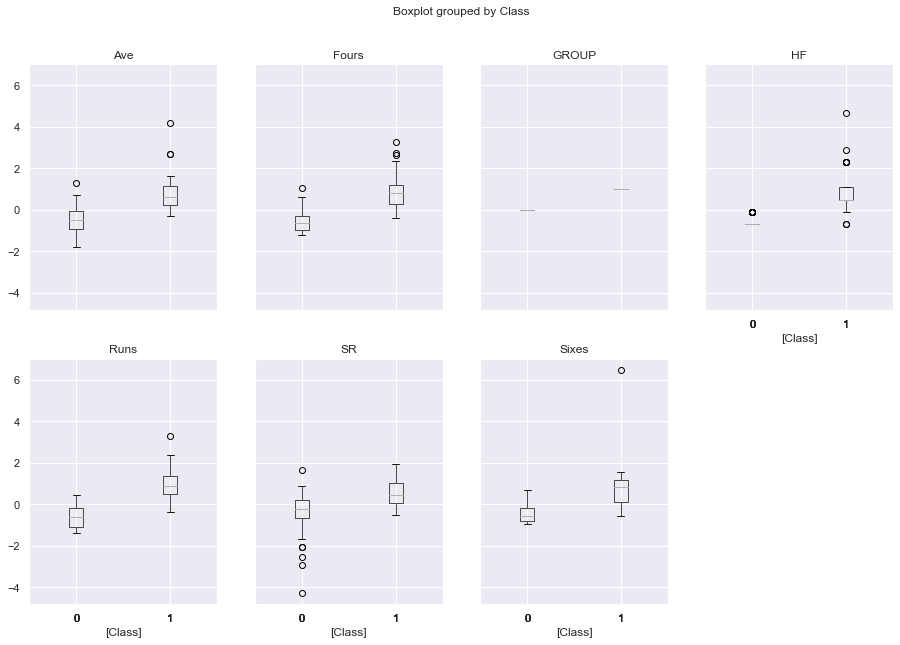

In [83]:
dfscaled1.boxplot(by='Class', layout = (2,4),figsize=(15,10))

#### Number of matches played is important feature of such datasets which is absent and reflects badly on analysis. 